In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
import seaborn as sns


### Задание

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую). 

2. Подготовьте датасет к обучению моделей.
    
    a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
    
    b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
    

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.


4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
    
    a) tree.DecisionTreeClassifier
    
    b) ensemble.RandomForestClassifier
    
    
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.


6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.


7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

    a) Повторите п. 5


8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

    a) Повторите п. 5
    

9. Сформулируйте выводы по проделанной работе.
    a) Сравните метрики построенных моделей.
    b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

**Результат:** получены знания по использованию базовых ансамблевых методов.

#### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [24]:
data = pd.read_csv('heart.csv')

In [148]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


#### 2. Подготовьте датасет к обучению моделей.
    
    a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
    
    b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data.FastingBS.unique()

array([0, 1], dtype=int64)

In [27]:
data[['Sex', 'ExerciseAngina']] = data[['Sex', 'ExerciseAngina']].apply(le.fit_transform)
data = pd.get_dummies(data, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

In [48]:
X = data.drop(['HeartDisease'], axis = 1)
Y = data.HeartDisease

In [51]:
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1


In [43]:
data_std = (X-X.mean())/X.std()

In [44]:
data_std.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432359,0.515671,0.410685,0.824621,-0.551041,1.382175,-0.823108,-0.831979,-1.083547,2.074046,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,-0.2713,-1.001635,1.150047
1,-0.478223,-1.937107,1.490940,-0.171867,-0.551041,0.753746,-0.823108,0.105606,-1.083547,-0.481624,1.875721,-0.229554,-0.507202,0.813831,-0.490182,-0.2713,0.997280,-0.868582
2,-1.750404,0.515671,-0.129442,0.769768,-0.551041,-1.524307,-0.823108,-0.831979,-1.083547,2.074046,-0.532547,-0.229554,-0.507202,-1.227418,2.037836,-0.2713,-1.001635,1.150047
3,-0.584238,-1.937107,0.302660,0.138964,-0.551041,-1.131539,1.213585,0.574398,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,-0.2713,0.997280,-0.868582
4,0.051853,0.515671,0.950812,-0.034736,-0.551041,-0.581664,-0.823108,-0.831979,-1.083547,-0.481624,1.875721,-0.229554,-0.507202,0.813831,-0.490182,-0.2713,-1.001635,1.150047


In [45]:
corr = data.corr()

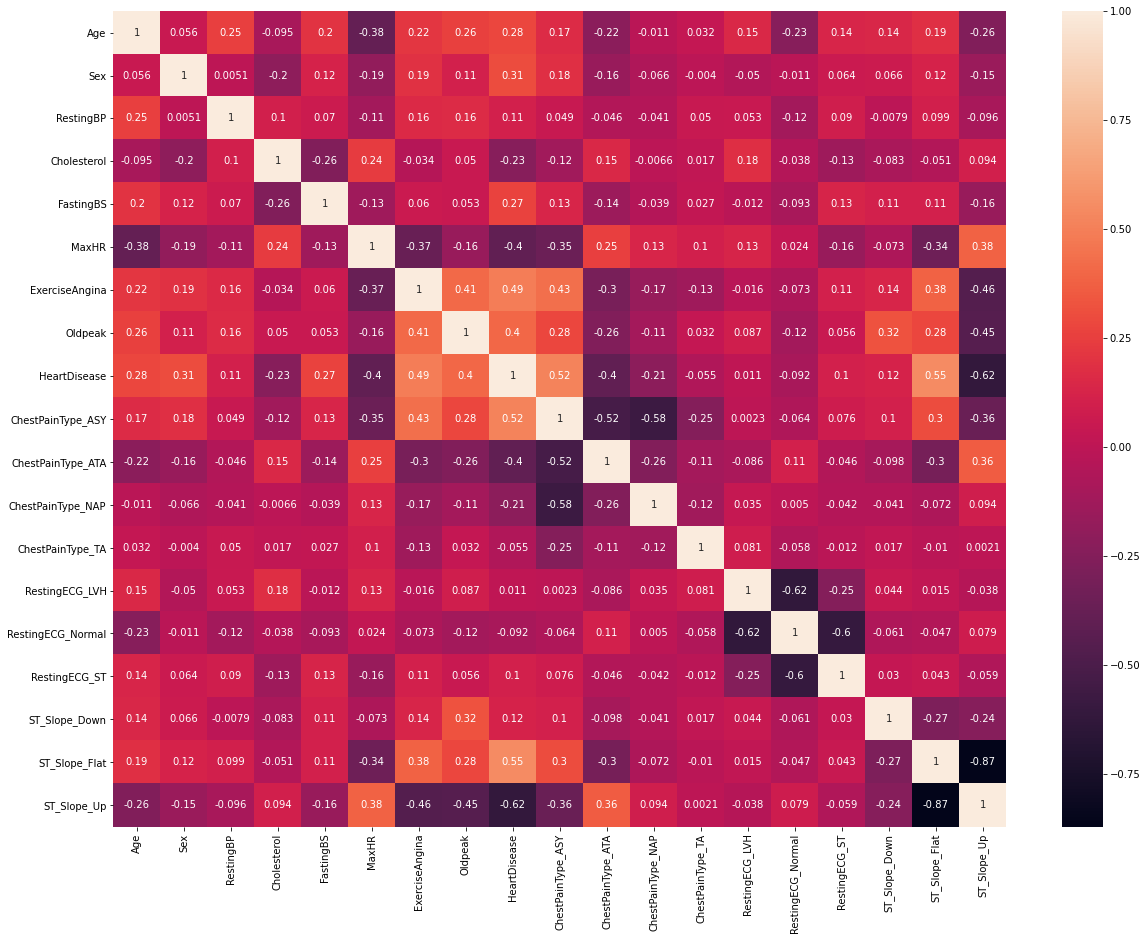

In [149]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

#### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [52]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data_std, Y, test_size=0.2, random_state=13)

#### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
    
    a) tree.DecisionTreeClassifier
    
    b) ensemble.RandomForestClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, random_state=0)

In [54]:
dtclf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [63]:
print('Decision Tree Classifier result:', round(dtclf.score(X_test, y_test), 3)*100,'%')

Decision Tree Classifier result: 83.7 %


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=4, random_state=0)

In [151]:
rfclf.fit(X_train, y_train)
print('Random Forest Classifier result:', round(rfclf.score(X_test, y_test), 3)*100, '%')

Random Forest Classifier result: 87.5 %


#### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [72]:
Y_pred_rfc = rfclf.predict(X_test)
Y_pred_dtc = dtclf.predict(X_test)
preds = {'Decision Tree Classifier:': Y_pred_dtc, 'Random Forest Classifier:': Y_pred_rfc}

In [152]:
from sklearn.metrics import classification_report
target_names = ['No HeartDisease', 'HeartDisease']
for k, i in preds.items():
    print(k, '\n', classification_report(y_test, i, target_names=target_names), '\n\n')

Decision Tree Classifier: 
                  precision    recall  f1-score   support

No HeartDisease       0.81      0.83      0.82        83
   HeartDisease       0.86      0.84      0.85       101

       accuracy                           0.84       184
      macro avg       0.84      0.84      0.84       184
   weighted avg       0.84      0.84      0.84       184
 


Random Forest Classifier: 
                  precision    recall  f1-score   support

No HeartDisease       0.88      0.84      0.86        83
   HeartDisease       0.88      0.90      0.89       101

       accuracy                           0.88       184
      macro avg       0.88      0.87      0.87       184
   weighted avg       0.88      0.88      0.87       184
 




#### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [120]:
importances = rfclf.feature_importances_
cols = list(X)

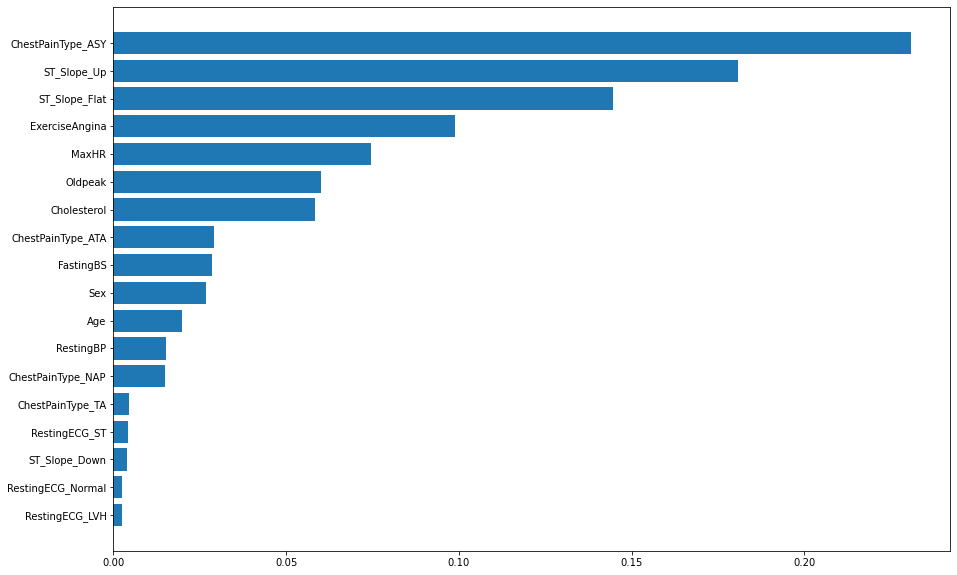

In [153]:
plt.rcParams["figure.figsize"] = (15,10)
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices])
ax.set_title("Таблица параметров")
ax.set_ylabel("степень важности параметра")
plt.yticks(range(len(indices)), [cols[i] for i in indices])
fig.tight_layout()


#### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

    a) Повторите п. 5

In [119]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [130]:
Y_pred_bag = bag_clf.predict(X_test)
print('Bagging Classifier result:\n\n', classification_report(y_test, Y_pred_bag, target_names=target_names))

Bagging Classifier result:

                  precision    recall  f1-score   support

No HeartDisease       0.84      0.84      0.84        83
   HeartDisease       0.87      0.87      0.87       101

       accuracy                           0.86       184
      macro avg       0.86      0.86      0.86       184
   weighted avg       0.86      0.86      0.86       184



#### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

    a) Повторите п. 5

In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
estimators = [('Decision Tree Classifier', dtclf), ('Random Forest Classifier', rfclf), ('svr', LinearSVC(penalty='l2', loss='squared_hinge', tol=0.0001, random_state=42, max_iter=2000))]
stack_clf = StackingClassifier(estimators=estimators)

In [146]:
stack_clf.fit(X_train, y_train)
Y_pred_stack = stack_clf.predict(X_test)

In [147]:
print('Stacking Classifier result:\n\n', classification_report(y_test, Y_pred_stack, target_names=target_names))

Stacking Classifier result:

                  precision    recall  f1-score   support

No HeartDisease       0.87      0.86      0.86        83
   HeartDisease       0.88      0.89      0.89       101

       accuracy                           0.88       184
      macro avg       0.87      0.87      0.87       184
   weighted avg       0.87      0.88      0.87       184

